In [706]:
# survival : survival key =0(No),1(Yes)
#pclass : ticket class key =1,2,3
#sex : sex
#Age : age in years
#sibsp : no of siblings/spouses aboard the titanic
#parch : no of parents/children aboard the titanic
#ticket : ticket no
#passenger : passenger fare
#cabin : cabin number
#embarked : port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [707]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [708]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [709]:
data_path="D:/datasets/titanic/train.csv"
data=pd.read_csv(data_path)

In [710]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [711]:
list(data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [712]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [713]:
data['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [714]:
data['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [715]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [716]:
data = data.drop('Cabin',axis = 1)

In [717]:
df = pd.DataFrame(data)

In [718]:
df['Age'][df['Sex']=='male'].min()

0.42

In [719]:
df.loc[df['Sex']=='male']['Age'].max()

80.0

In [720]:
df['Age'][df['Sex']=='male'].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

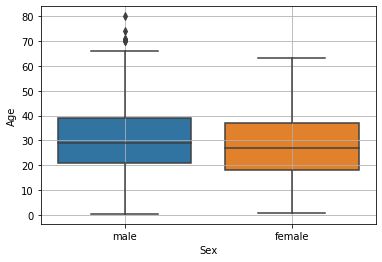

In [721]:
sns.boxplot(x = 'Sex' , y = 'Age' , data = df).grid()

In [722]:
df['Age'][df['Sex']=='male'].isnull().sum()

124

In [723]:
df['Age'][df['Sex']=='female'].isnull().sum()

53

In [724]:
df['Age'][df['Sex']=='male'].isnull().value_counts()

False    453
True     124
Name: Age, dtype: int64

In [725]:
df['Age'][df['Sex']=='female'].isnull().value_counts()

False    261
True      53
Name: Age, dtype: int64

In [726]:
df['Age'][df['Sex']=='female'].count()

261

In [727]:
#percentage of missing values for female category
female = df['Age'][df['Sex']=='female'].isnull().sum()/(df['Age'][df['Sex']=='female'].isnull().sum() + df['Age'][df['Sex']=='female'].notnull().sum())
female

0.16878980891719744

In [728]:
#percentage of missing values for male category
male = df['Age'][df['Sex']=='male'].isnull().sum()/(df['Age'][df['Sex']=='male'].isnull().sum() + df['Age'][df['Sex']=='male'].notnull().sum())
male

0.21490467937608318

In [729]:
df['Age'][df['Sex']=='male'].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [730]:
Q1 = df['Age'][df['Sex']=='male'].quantile(0.25)
Q1

21.0

In [731]:
Q3 = df['Age'][df['Sex']=='male'].quantile(0.75)
Q3

39.0

In [732]:
IQR = Q3 - Q1

In [733]:
print(Q3 + 1.5*IQR)

66.0


In [734]:
df[(df['Age']>66) & (df['Sex']=='male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


In [735]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [736]:
df['Age'][df['Pclass']==1].median()

37.0

In [737]:
df['Age'][df['Pclass']==2].median()

29.0

In [738]:
df['Age'][df['Pclass']==3].median()

24.0

In [739]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [740]:
df1 = df[(df['Age']>66) & (df['Sex']=='male')]
df2 = df[(df['Age']<66) & (df['Sex']=='male')]
#meanMale = df2['Age'].mean()
#meanMale
medianMale = df['Age'][df['Sex']=='male'].median()
medianMale
#medianMale
#df['Age'][df['Sex']=='male'].isna().value_counts()

27.0

In [741]:
#df['Age'][df['Sex']=='male']=df['Age'][df['Sex']=='male'].fillna(medianMale)

In [742]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [743]:
df['Age'][df['Sex']=='male'].head(10)

0     22.0
4     35.0
5     24.0
6     54.0
7      2.0
12    20.0
13    39.0
16     2.0
17    29.0
20    35.0
Name: Age, dtype: float64

In [744]:
df['Age'][df['Sex']=='female'].isna().value_counts()

False    314
Name: Age, dtype: int64

In [745]:
meanFemale = df['Age'][df['Sex']=='female'].mean()
meanFemale

27.659235668789808

In [746]:
#df['Age'][df['Sex']=='female'] = df['Age'][df['Sex']=='female'].fillna(meanFemale)

In [747]:
#using z score
df['age_zscore'] = (df['Age'] - df['Age'].mean())/df['Age'].std()

In [748]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.533534
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.674512
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.231523
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.448003
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.448003
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,-0.382528
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1.882557
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,-2.043591
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,-0.156020
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,-1.137557


In [749]:
#df = df[~((df['age_zscore']<-3) | (df['age_zscore']>3))]

In [750]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.533534
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.674512


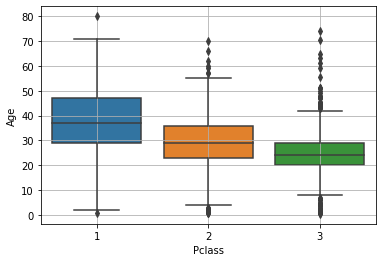

In [751]:
sns.boxplot(x = 'Pclass' , y = 'Age' , data = df).grid()

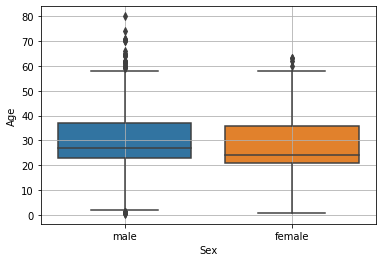

In [752]:
sns.boxplot(x = 'Sex' , y = 'Age' , data = df).grid()

In [753]:
Q1 = df['Age'][df['Sex']=='male'].quantile(0.25)
Q1

23.0

In [754]:
Q3 = df['Age'][df['Sex']=='male'].quantile(0.75)
Q3

37.0

In [755]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
age_zscore     0
dtype: int64

In [756]:
dfMale = df[df['Sex']=='male']

In [757]:
dfFemale = df[df['Sex']=='female']

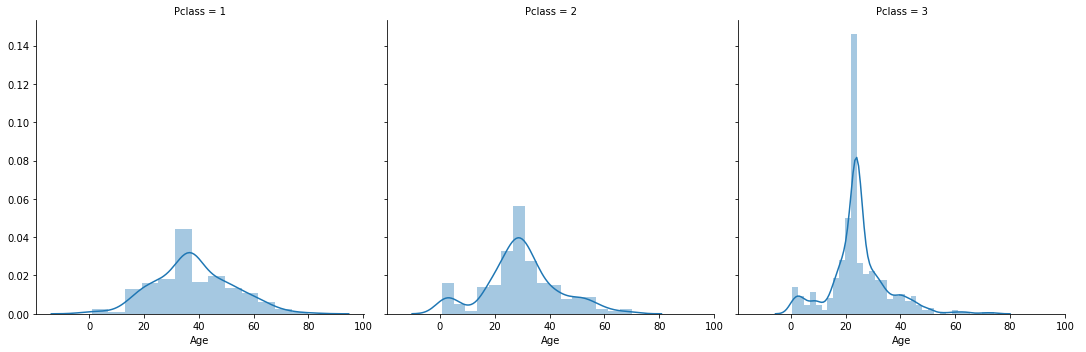

In [758]:
g= sns.FacetGrid(df , col = 'Pclass', height =5)
g.map(sns.distplot, 'Age').add_legend()

#sns.distplot(df['Age'],bins=100)

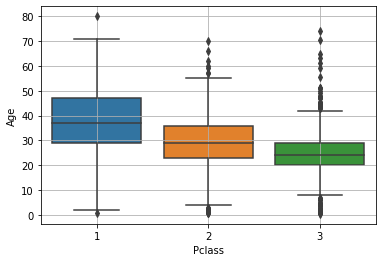

In [759]:
sns.boxplot(x = 'Pclass' , y = 'Age' , data = df).grid()

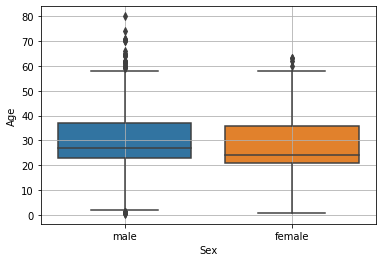

In [760]:
sns.boxplot(x = 'Sex' , y = 'Age' , data = df).grid()

In [761]:
Qpclass1 = df['Age'][df['Pclass']==1].quantile(0.25)
Qpclass1

29.0

In [762]:
Qpclass2 = df['Age'][df['Pclass']==1].quantile(0.75)
Qpclass2

47.25

In [763]:
QpclassIQR = Qpclass2 - Qpclass1
QpclassIQR

18.25

In [764]:
val = Qpclass1-1.5*QpclassIQR
val

1.625

In [765]:
val1 = Qpclass2+1.5*QpclassIQR
val1

74.625

In [766]:
df[((df['Age']<=(val)) | (df['Age']>=(val1))) & (df['Pclass']==1)]
#df[(df['Age']<1.625]
#df[df['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,S,-2.125134
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.00,S,3.845632


In [767]:
# removing outliers from Pclass = 1
#df = df[~(((df['Age']<(val)) | (df['Age']>(val1))) & (df['Pclass']==1))]

In [768]:
df['Age'].describe()

count    891.000000
mean      29.066409
std       13.244532
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [769]:
#Normalization function
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y
df['AgeNormalized'] = normalize(df.Age)
df['AgeNormalized'].describe()

count    891.000000
mean       0.359970
std        0.166430
min        0.000000
25%        0.271174
50%        0.321438
75%        0.459663
max        1.000000
Name: AgeNormalized, dtype: float64

In [770]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.533534,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.674512,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.231523,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.448003,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.448003,0.434531


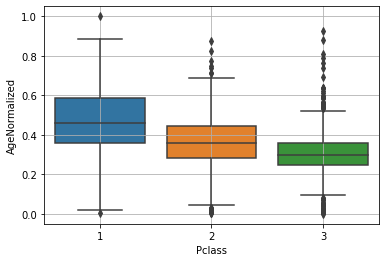

In [771]:
sns.boxplot(x = 'Pclass' , y = 'AgeNormalized' , data = df).grid()

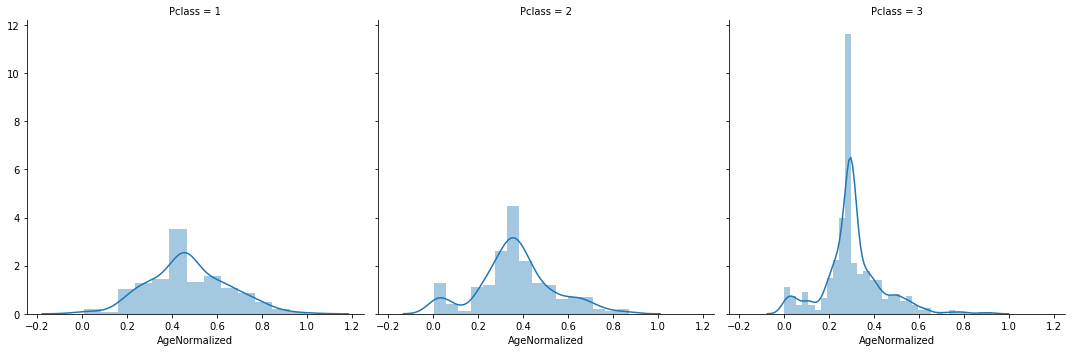

In [772]:
g= sns.FacetGrid(df , col = 'Pclass', height =5)
g.map(sns.distplot, 'AgeNormalized').add_legend()

#sns.distplot(df['Age'],bins=100)

In [773]:
# applying log function
df['AgeLog'] = np.log(df.Age)
df['AgeLog'].describe()

count    891.000000
mean       3.209191
std        0.706578
min       -0.867501
25%        3.091042
50%        3.258097
75%        3.610918
max        4.382027
Name: AgeLog, dtype: float64

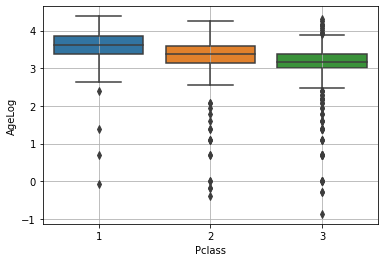

In [774]:
sns.boxplot(x = 'Pclass' , y = 'AgeLog' , data = df).grid()

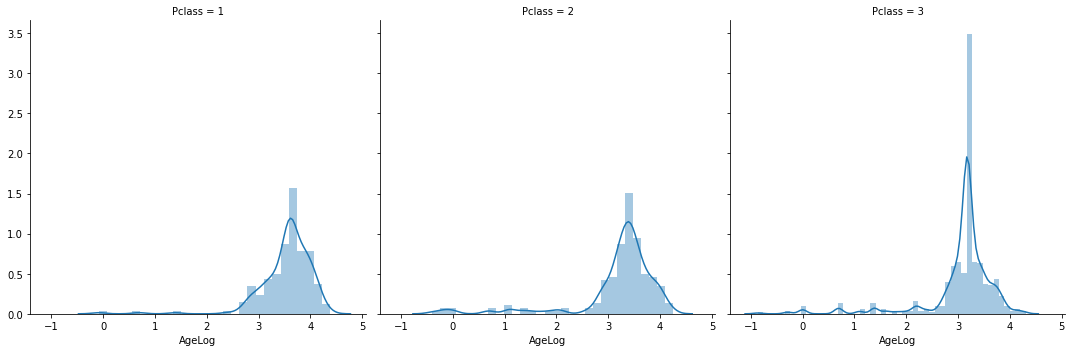

In [775]:
g= sns.FacetGrid(df , col = 'Pclass', height =5)
g.map(sns.distplot, 'AgeLog').add_legend()

#sns.distplot(df['Age'],bins=100)

In [776]:
#log normalized
df['AgeLogNormalized'] = normalize(df['AgeLog'])
df['AgeLogNormalized'].describe()

count    891.000000
mean       0.776583
std        0.134598
min        0.000000
25%        0.754076
50%        0.785899
75%        0.853109
max        1.000000
Name: AgeLogNormalized, dtype: float64

In [777]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized,AgeLog,AgeLogNormalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.533534,0.271174,3.091042,0.754076
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.674512,0.472229,3.637586,0.858189
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.231523,0.321438,3.258097,0.785899
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.448003,0.434531,3.555348,0.842523
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.448003,0.434531,3.555348,0.842523


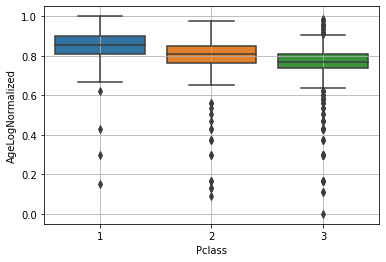

In [778]:
sns.boxplot(x = 'Pclass' , y = 'AgeLogNormalized' , data = df).grid()

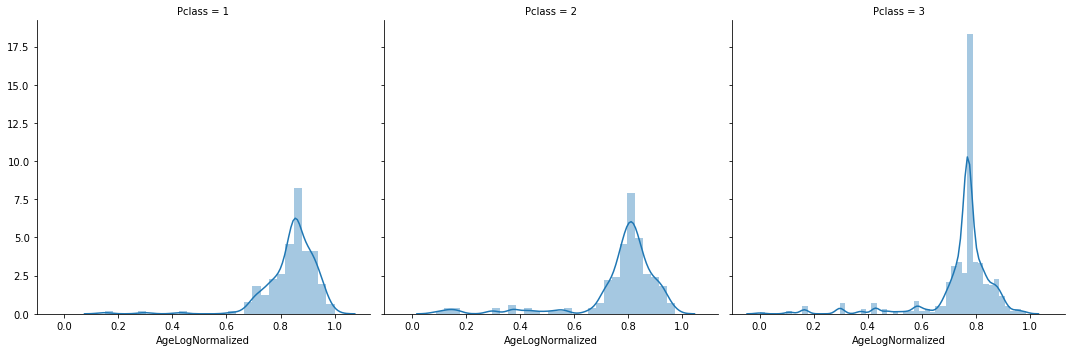

In [779]:
g= sns.FacetGrid(df , col = 'Pclass', height =5)
g.map(sns.distplot, 'AgeLogNormalized').add_legend()

#sns.distplot(df['Age'],bins=100)

In [780]:
# Pclass == 1

a = df['AgeLogNormalized'][df['Pclass']==1].quantile(0.25)
b = df['AgeLogNormalized'][df['Pclass']==1].quantile(0.75)
c = b - a
d = b + 1.5*c
e = a - 1.5*c
e

0.6672265094787141

In [781]:
df[((df['AgeLogNormalized']>d) | (df['AgeLogNormalized']<e)) & (df['Pclass']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized,AgeLog,AgeLogNormalized
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,-2.043591,0.019854,0.693147,0.297293
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,-2.125134,0.006283,-0.083382,0.149369
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,S,-1.892585,0.044986,1.386294,0.429333
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,S,-1.364065,0.132948,2.397895,0.622036


In [782]:
df = df[~(((df['AgeLogNormalized']>d) | (df['AgeLogNormalized']<e)) & (df['Pclass']==1))]

In [783]:
# Pclass == 2

a2 = df['AgeLogNormalized'][df['Pclass']==2].quantile(0.25)
b2 = df['AgeLogNormalized'][df['Pclass']==2].quantile(0.75)
c2 = b2 - a2
d2 = b2 + 1.5*c2
e2 = a2 - 1.5*c2
e2

0.6345252765495049

In [784]:
df[((df['AgeLogNormalized']>d2) | (df['AgeLogNormalized']<e2)) & (df['Pclass']==2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized,AgeLog,AgeLogNormalized
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,C,-1.968088,0.032420,1.098612,0.374531
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,S,-1.817083,0.057552,1.609438,0.471840
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S,-2.131930,0.005152,-0.186330,0.129759
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,S,-2.119094,0.007288,0.000000,0.165253
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,S,-1.968088,0.032420,1.098612,0.374531
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.00,0,2,C.A. 31921,26.2500,S,-1.590574,0.095250,2.079442,0.561373
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,S,-2.043591,0.019854,0.693147,0.297293
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,S,-1.968088,0.032420,1.098612,0.374531
530,531,1,2,"Quick, Miss. Phyllis May",female,2.00,1,1,26360,26.0000,S,-2.043591,0.019854,0.693147,0.297293
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.00,0,2,F.C.C. 13529,26.2500,S,-1.666077,0.082684,1.945910,0.535936


In [785]:
df = df[~(((df['AgeLogNormalized']>d2) | (df['AgeLogNormalized']<e2)) & (df['Pclass']==2))]

In [786]:
# Pclass == 3

a3 = df['AgeLogNormalized'][df['Pclass']==3].quantile(0.25)
b3 = df['AgeLogNormalized'][df['Pclass']==3].quantile(0.75)
c3 = b3 - a3
d3 = b3 + 1.5*c3
e3 = a3 - 1.5*c3
d3

0.9093432777592192

In [787]:
df[((df['AgeLogNormalized']>d3) | (df['AgeLogNormalized']<e3)) & (df['Pclass']==3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized,AgeLog,AgeLogNormalized
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S,-2.043591,0.019854,0.693147,0.297293
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,S,-1.892585,0.044986,1.386294,0.429333
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q,-2.043591,0.019854,0.693147,0.297293
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,S,-1.590574,0.095250,2.079442,0.561373
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,S,-1.666077,0.082684,1.945910,0.535936
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,S,-1.364065,0.132948,2.397895,0.622036
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,S,-1.892585,0.044986,1.386294,0.429333
94,95,0,3,"Coxon, Mr. Daniel",male,59.00,0,0,364500,7.2500,S,2.260072,0.736115,4.077537,0.941997
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,Q,3.128355,0.880623,4.255613,0.975919
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,S,-2.043591,0.019854,0.693147,0.297293


In [788]:
df = df[~(((df['AgeLogNormalized']>d3) | (df['AgeLogNormalized']<e3)) & (df['Pclass']==3))]

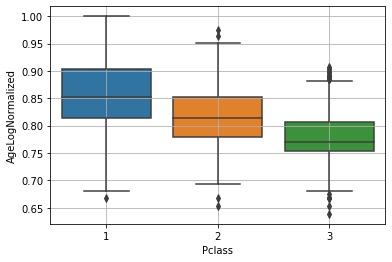

In [789]:
sns.boxplot(x = 'Pclass' , y = 'AgeLogNormalized' , data = df).grid()

In [790]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized,AgeLog,AgeLogNormalized
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,0.674512,0.472229,3.637586,0.858189
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,2.486580,0.773813,4.127134,0.951445


In [791]:
df['Embarked'].value_counts()

S    581
C    158
Q     71
Name: Embarked, dtype: int64

In [792]:
df['Embarked'].fillna("S",inplace = True)

In [793]:
df['Embarked'].value_counts()

S    583
C    158
Q     71
Name: Embarked, dtype: int64

In [794]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
age_zscore          0
AgeNormalized       0
AgeLog              0
AgeLogNormalized    0
dtype: int64

In [795]:
#df = df[~((df['AgeLogNormalized']>d) & (df['Sex']=='male'))]

In [796]:
#df2 = df[(df['Age']>0) & (df['Age']<18) & (df['Sex']=='male')].Age 
#medianMale = df[(df['Age']>0) & (df['Age']<18) & (df['Sex']=='male')].Age.median()
#df2['Age'] = medianMale

In [797]:
df[(df['SibSp']==0) & (df['Parch']==0) & (df['Sex']=='male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized,AgeLog,AgeLogNormalized
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.448003,0.434531,3.555348,0.842523
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,-0.382528,0.296306,3.178054,0.770651
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1.882557,0.673285,3.988984,0.925128
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,-0.684540,0.246042,2.995732,0.735920
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,S,-0.005014,0.359135,3.367296,0.806701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S,-0.080517,0.346569,3.332205,0.800016
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,-0.307025,0.308872,3.218876,0.778428
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,-0.156020,0.334004,3.295837,0.793088
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,-0.231523,0.321438,3.258097,0.785899


In [798]:
df[['LastName','FirstName']] = df.Name.str.split(",",expand = True)

In [799]:
df['Title'] = df.FirstName.str.split(' ').str[1]

In [800]:
df['Title'].value_counts()

Mr.          506
Miss.        150
Mrs.         124
Dr.            7
Rev.           6
Master.        5
Mlle.          2
Major.         2
Col.           2
Sir.           1
the            1
Mme.           1
Lady.          1
Don.           1
Ms.            1
Capt.          1
Jonkheer.      1
Name: Title, dtype: int64

In [801]:
df['FamilySize'] = df.SibSp + df.Parch + 1

In [802]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized,AgeLog,AgeLogNormalized,LastName,FirstName,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.533534,0.271174,3.091042,0.754076,Braund,Mr. Owen Harris,Mr.,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.674512,0.472229,3.637586,0.858189,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs.,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.231523,0.321438,3.258097,0.785899,Heikkinen,Miss. Laina,Miss.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.448003,0.434531,3.555348,0.842523,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs.,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.448003,0.434531,3.555348,0.842523,Allen,Mr. William Henry,Mr.,1


In [803]:
df[df['Title']=='Dr.']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized,AgeLog,AgeLogNormalized,LastName,FirstName,Title,FamilySize
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,Q,1.127529,0.547625,3.784190,0.886116,Minahan,Dr. William Edward,Dr.,3
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,S,1.882557,0.673285,3.988984,0.925128,Moraweck,Dr. Ernest,Dr.,1
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,S,-0.458031,0.283740,3.135494,0.762544,Pain,Dr. Alfred,Dr.,1
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,C,0.221495,0.396833,3.465736,0.825453,Stahelin-Maeglin,Dr. Max,Dr.,1
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,1.580546,0.623021,3.912023,0.910467,Frauenthal,Dr. Henry William,Dr.,3
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,37.0,0,0,112379,39.6000,C,0.599009,0.459663,3.610918,0.853109,Brewe,Dr. Arthur Jackson,Dr.,1
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,1.505043,0.610455,3.891820,0.906619,Leader,Dr. Alice (Farnham),Dr.,1


In [804]:
#Drnan = df[(df['Age'].isnull() == True) & (df['Title']=='Dr.')]

In [805]:
#Drmalemean = df[(df['Age'].notnull() == True) & (df['Title']=='Dr.') & (df['Sex']=='male')]['Age'].mean()

In [806]:
#Drnan.fillna(Drmalemean, inplace = True)

In [807]:
df1 = df.groupby('Title',as_index = False)['Age'].mean().reset_index()

In [808]:
df1.loc[df1['index']==0]['Age']

0    70.0
Name: Age, dtype: float64

In [809]:
grouped = df.groupby(['Sex','Pclass','Embarked'])
grouped.Age.mean()

Sex     Pclass  Embarked
female  1       C           36.162791
                Q           33.000000
                S           34.387755
        2       C           21.833333
                Q           29.500000
                S           32.575000
        3       C           21.911765
                Q           23.651515
                S           27.114286
male    1       C           39.666667
                Q           44.000000
                S           42.375000
        2       C           29.388889
                Q           57.000000
                S           33.286517
        3       C           25.512195
                Q           25.378788
                S           26.625523
Name: Age, dtype: float64

In [810]:
df.Age = grouped.Age.apply(lambda x: x.fillna(x.mean()))

In [811]:
most_embarked = df.Embarked.value_counts().index[0]

# fill NaN with most_embarked value
df.Embarked = df.Embarked.fillna(most_embarked)

In [812]:
#replacing na values in male data
#df['Age'][df['Sex']=='male'].fillna(meanMale, inplace = True)

In [813]:
#replacing na values in female data
#df['Age'][df['Sex']=='female'].fillna(meanFemale, inplace = True)

In [814]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
age_zscore          0
AgeNormalized       0
AgeLog              0
AgeLogNormalized    0
LastName            0
FirstName           0
Title               0
FamilySize          0
dtype: int64

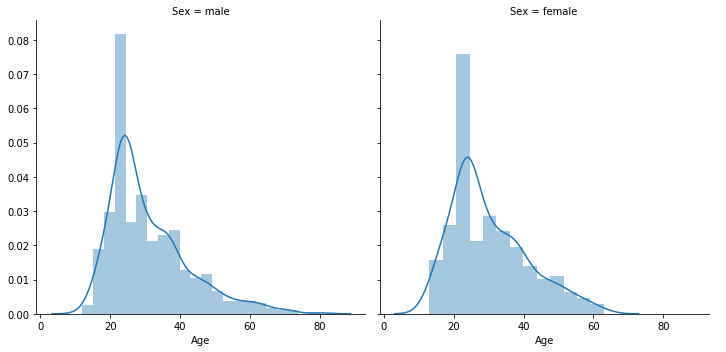

In [815]:
g1 = sns.FacetGrid(df, col = 'Sex', height = 5)
g1.map(sns.distplot, 'Age').add_legend()

In [816]:
#to check the relation between Pclass and Survived

df.groupby('Survived')['Pclass'].describe()#.reset_index()
#temp.pivot(index = 'level_1', columns = 'level_0', values=0)

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,510.0,2.500000,0.748935,1.0,2.0,3.0,3.0,3.0
1,302.0,1.887417,0.870659,1.0,1.0,2.0,3.0,3.0


In [817]:
df.groupby('Pclass')['Survived'].value_counts(normalize = True)*100

Pclass  Survived
1       1           62.735849
        0           37.264151
2       0           58.083832
        1           41.916168
3       0           77.136259
        1           22.863741
Name: Survived, dtype: float64

In [818]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,79,97,334
1,133,70,99


In [819]:
df.groupby('Pclass',as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.627358
1,2,0.419162
2,3,0.228637


In [820]:
df.groupby('Sex',as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.758007
1,male,0.167608


In [821]:
df.groupby('Embarked',as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.537975
1,Q,0.422535
2,S,0.320755


In [855]:
df.groupby('Fare',as_index=False)['Survived'].mean()

,Fare,Survived
0,0.0000,0.066667
1,4.0125,0.000000
2,5.0000,0.000000
3,6.4375,0.000000
4,6.4500,0.000000
...,...,...
236,227.5250,0.750000
237,247.5208,0.500000
238,262.3750,1.000000
239,263.0000,0.500000


In [822]:
data.groupby('SibSp',as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [823]:
data.groupby('Parch',as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [824]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.533534,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.674512,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.231523,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.448003,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.448003,0.434531


In [825]:
from sklearn.preprocessing import LabelEncoder

In [826]:
gle1 = LabelEncoder()
embarked_labels = gle1.fit_transform(df['Embarked'])
embarked_mappings = {index: label for index, label in 
                  enumerate(gle1.classes_)}
embarked_mappings


{0: 'C', 1: 'Q', 2: 'S'}

In [827]:
df['Emb_labels'] = embarked_labels

In [828]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized,AgeLog,AgeLogNormalized,LastName,FirstName,Title,FamilySize,Emb_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.533534,0.271174,3.091042,0.754076,Braund,Mr. Owen Harris,Mr.,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.674512,0.472229,3.637586,0.858189,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs.,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.231523,0.321438,3.258097,0.785899,Heikkinen,Miss. Laina,Miss.,1,2


In [829]:
gle = LabelEncoder()
sex_labels = gle.fit_transform(df['Sex'])
sex_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
sex_mappings

{0: 'female', 1: 'male'}

In [830]:
df['Sex_labels'] = sex_labels

In [831]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_zscore,AgeNormalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.533534,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.674512,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.231523,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.448003,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.448003,0.434531


In [832]:
df = df.drop(['Name','Sex','Ticket'],axis=1)

In [833]:
#df = df.drop(['Embarked'],axis=1)

In [856]:
#X = df[df.loc[:, df.columns != 'Survived'].columns]
#X = X.drop('PassengerId',axis = 1)
#X = X.drop('Fare',axis = 1)
#X = X.drop('Age',axis = 1)
#X = X.drop('AgeLog',axis = 1)
#X = X.drop('AgeNormalized',axis = 1)
#X = X.drop('Emb_labels',axis = 1)
y = df['Survived']
X = df
X = X.drop('AgeLog',axis = 1)
X = X.drop('Age',axis = 1)
X = X.drop('AgeNormalized',axis = 1)
X = X.drop('age_zscore',axis = 1)
X = X.drop(['LastName','FirstName','Title','Embarked','Survived','PassengerId'],axis=1)
X = X.drop(['SibSp','Parch'],axis=1)
X = X.drop('Fare',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=101)
X.head(3)

,Pclass,AgeLogNormalized,FamilySize,Emb_labels,Sex_labels
0,3,0.754076,2,2,1
1,1,0.858189,2,0,0
2,3,0.785899,1,2,0


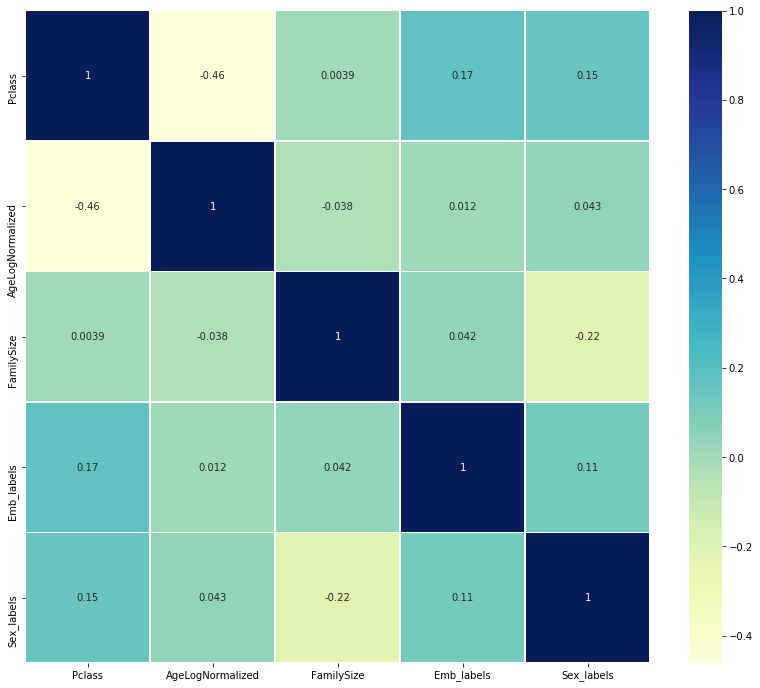

In [857]:
corrmat = X.corr()
fig = plt.figure(figsize = (14, 12))
sns.heatmap(corrmat,cmap='YlGnBu', annot=True, linewidths=.5);
plt.show()

In [858]:
# def get_data_splits(dataframe, valid_fraction=0.1):
#     valid_fraction = 0.1
#     valid_size = int(len(dataframe) * valid_fraction)

#     train = dataframe[:-valid_size * 2]
#     # valid size == test size, last two sections of the data
#     valid = dataframe[-valid_size * 2:-valid_size]
#     test = dataframe[-valid_size:]
    
#     return train, valid, test

In [859]:
# from sklearn.feature_selection import SelectKBest, f_classif

# feature_cols = X.columns.drop('Survived')

# # Keep 5 features
# selector = SelectKBest(f_classif, k=5)

# X_new = selector.fit_transform(X[feature_cols], X['Survived'])
# X_new

In [860]:
# feature_cols = X.columns.drop('Survived')
# train, valid, _ = get_data_splits(X)

# # Keep 5 features
# selector = SelectKBest(f_classif, k=5)

# X_new = selector.fit_transform(train[feature_cols], train['Survived'])
# X_new

In [861]:
# # Get back the features we've kept, zero out all other features
# selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
#                                  index=train.index, 
#                                  columns=feature_cols)
# selected_features.head()

In [862]:
# # Dropped columns have values of all 0s, so var is 0, drop them
# selected_columns = selected_features.columns[selected_features.var() != 0]

# # Get the valid dataset with the selected features.
# valid[selected_columns].head()

In [863]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import SelectFromModel

# train, valid, _ = get_data_splits(X)

# X, y = train[train.columns.drop("Survived")], train['Survived']

# # Set the regularization parameter C=1
# logistic = LogisticRegression(C=1, penalty="l1", random_state=7).fit(X, y)
# model = SelectFromModel(logistic, prefit=True)

# X_new = model.transform(X)
# X_new

In [864]:
# # Get back the kept features as a DataFrame with dropped columns as all 0s
# selected_features = pd.DataFrame(model.inverse_transform(X_new), 
#                                  index=X.index,
#                                  columns=X.columns)

# # Dropped columns have values of all 0s, keep other columns 
# selected_columns = selected_features.columns[selected_features.var() != 0]
# #selected_columns
# selected_features

In [865]:
# df.head(3)

In [866]:
# print('Inputs: \n', X_train.head())
# print('Outputs: \n', y_train.head())

In [867]:
#heat_map = sns.heatmap(X,cmap="YlGnBu")

In [868]:
#Stochastic Gradient Descent

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

72.47

In [869]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest 

93.01

In [870]:
#logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

82.88

In [871]:
# KNN 

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

87.53

In [872]:
#Gaussian Naive Bayes

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train) 
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

81.23

In [873]:
#Linear SVM 

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


82.74

In [874]:
#Decision Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.01

In [875]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.01,Random Forest
93.01,Decision Tree
87.53,KNN
82.88,Logistic Regression
82.74,Support Vector Machines
81.23,Naive Bayes
72.47,Stochastic Gradient Decent


In [854]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75342466 0.82191781 0.84931507 0.84931507 0.78082192 0.83561644
 0.7260274  0.8630137  0.78082192 0.83561644]
Mean: 0.8095890410958905
Standard Deviation: 0.043942506663960094
